In [176]:
ground_truth_images_path = './U-2-Net/test_data/ground_truth/'
total_pixels = 320**2

import os
from PIL import Image
import numpy as np
import glob

In [177]:
def get_IoU_scores(predicted_images_path, export_images_names=False):
    img_name_list = glob.glob(os.path.join(predicted_images_path, '*.png'))
    prediction_dir = predicted_images_path
    # from u2net_test
    # --------- 5. calculate IoU ---------
    def iou(pred, target):
        pred = pred.squeeze().astype(bool)
        target = target.squeeze().astype(bool)

        intersection = np.logical_and(target, pred)
        union = np.logical_or(target, pred)
        iou_score = np.sum(intersection) / np.sum(union)
        return iou_score

    IoU_scores = []
    for i, image_path in enumerate(img_name_list):
        image_name = image_path.split(os.sep)[-1].replace('.jpg', '.png')
        prediction_path = os.path.join(prediction_dir, image_name)
        prediction = Image.open(prediction_path).convert('L')
        prediction = np.array(prediction)
        prediction = np.where(prediction > 127, 1, 0)
        
        ground_truth_path = os.path.join(ground_truth_images_path, image_name)
        ground_truth = Image.open(ground_truth_path)
        ground_truth = np.array(ground_truth)
        ground_truth = np.where(ground_truth > 127, 1, 0)
        
        IoU_scores.append(iou(prediction, ground_truth))

    # print(f"Total pixels: {total_pixels}")
    # print(f"Mean IoU: {np.mean(IoU_scores)} ({total_pixels - np.mean(IoU_scores)*total_pixels} pixels)")
    # print(f"Median IoU: {np.median(IoU_scores)} ({total_pixels - np.median(IoU_scores)*total_pixels} pixels)")
    # print(f"Max IoU: {np.max(IoU_scores)} ({total_pixels - np.max(IoU_scores)*total_pixels} pixels)")
    # print(f"Min IoU: {np.min(IoU_scores)} ({total_pixels - np.min(IoU_scores)*total_pixels} pixels)")
    if export_images_names:
        return IoU_scores, img_name_list
    return IoU_scores

In [178]:
U2net_predicted_images_path = './U-2-Net/test_data/u2net_finetuned_results/'
IS_net_predicted_images_path = './DIS/your-results/DIS5K-VD'
U2Net_IoU_scores = get_IoU_scores(U2net_predicted_images_path)
ISNet_IoU_scores = get_IoU_scores(IS_net_predicted_images_path)
U2Net_IoU_scores_in_pixels = [total_pixels - i*total_pixels for i in U2Net_IoU_scores]
ISNet_IoU_scores_in_pixels = [total_pixels - i*total_pixels for i in ISNet_IoU_scores]

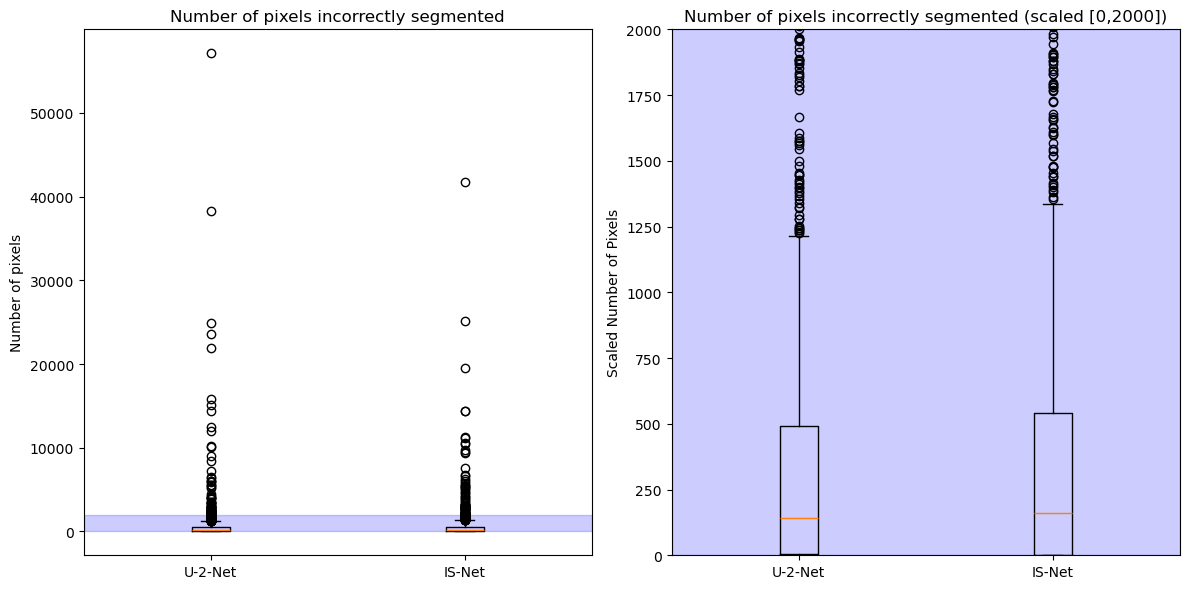

In [179]:
#plot the box plot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First box plot
axes[0].boxplot([U2Net_IoU_scores_in_pixels, ISNet_IoU_scores_in_pixels])
axes[0].set_xticklabels(['U-2-Net', 'IS-Net'])
axes[0].set_title(f'Number of pixels incorrectly segmented')
axes[0].set_ylabel('Number of pixels')

scale = 2000
# Add red rectangle to indicate scaled area
axes[0].axhspan(0, scale, color='blue', alpha=0.2)

# Second box plot with scaled y-axis
axes[1].boxplot([U2Net_IoU_scores_in_pixels, ISNet_IoU_scores_in_pixels])
axes[1].set_xticklabels(['U-2-Net', 'IS-Net'])
axes[1].set_title(f'Number of pixels incorrectly segmented (scaled [0,{scale}])')
axes[1].set_ylim(0, scale)
axes[1].set_ylabel('Scaled Number of Pixels')
axes[1].axhspan(0, scale, color='blue', alpha=0.2)

plt.tight_layout()
plt.show()


In [181]:
# compare metrics

print(f"Total pixels: {total_pixels}")
print(f"Mean U2Net IoU: {np.mean(U2Net_IoU_scores)} ({total_pixels - int(np.mean(U2Net_IoU_scores)*total_pixels)} error pixels)")
print(f"Mean ISNet IoU: {np.mean(ISNet_IoU_scores)} ({total_pixels - int(np.mean(ISNet_IoU_scores)*total_pixels)} error pixels)")
print(f"Standard deviation U2Net IoU: {np.std(U2Net_IoU_scores)} ({int(np.std(U2Net_IoU_scores)*total_pixels)} pixels)")
print(f"Standard deviation ISNet IoU: {np.std(ISNet_IoU_scores)} ({int(np.std(ISNet_IoU_scores)*total_pixels)} pixels)")
print(f"Median U2Net IoU: {np.median(U2Net_IoU_scores)} ({total_pixels - int(np.median(U2Net_IoU_scores)*total_pixels)} error pixels)")
print(f"Median ISNet IoU: {np.median(ISNet_IoU_scores)} ({total_pixels - int(np.median(ISNet_IoU_scores)*total_pixels)} error pixels)")
# print(f"Max U2Net IoU: {np.max(U2Net_IoU_scores)} ({total_pixels - int(np.max(U2Net_IoU_scores)*total_pixels)} error pixels)")
# print(f"Max ISNet IoU: {np.max(ISNet_IoU_scores)} ({total_pixels - int(np.max(ISNet_IoU_scores)*total_pixels)} error pixels)")
# print(f"Min U2Net IoU: {np.min(U2Net_IoU_scores)} ({total_pixels - int(np.min(U2Net_IoU_scores)*total_pixels)} error pixels)")
# print(f"Min ISNet IoU: {np.min(ISNet_IoU_scores)} ({total_pixels - int(np.min(ISNet_IoU_scores)*total_pixels)} error pixels)")
print(f"Q3 U2Net IoU: {np.percentile(U2Net_IoU_scores, 75)} ({total_pixels - int(np.percentile(U2Net_IoU_scores, 75)*total_pixels)} error pixels)")
print(f"Q3 ISNet IoU: {np.percentile(ISNet_IoU_scores, 75)} ({total_pixels - int(np.percentile(ISNet_IoU_scores, 75)*total_pixels)} error pixels)")

Total pixels: 102400
Mean U2Net IoU: 0.9940997593659155 (605 error pixels)
Mean ISNet IoU: 0.9944767464834147 (566 error pixels)
Standard deviation U2Net IoU: 0.023821266267121693 (2439 pixels)
Standard deviation ISNet IoU: 0.017808233502395254 (1823 pixels)
Median U2Net IoU: 0.9986271002463436 (141 error pixels)
Median ISNet IoU: 0.9984415902950501 (160 error pixels)
Q3 U2Net IoU: 0.9999510581557618 (6 error pixels)
Q3 ISNet IoU: 0.9999790532048597 (3 error pixels)


# human eye check

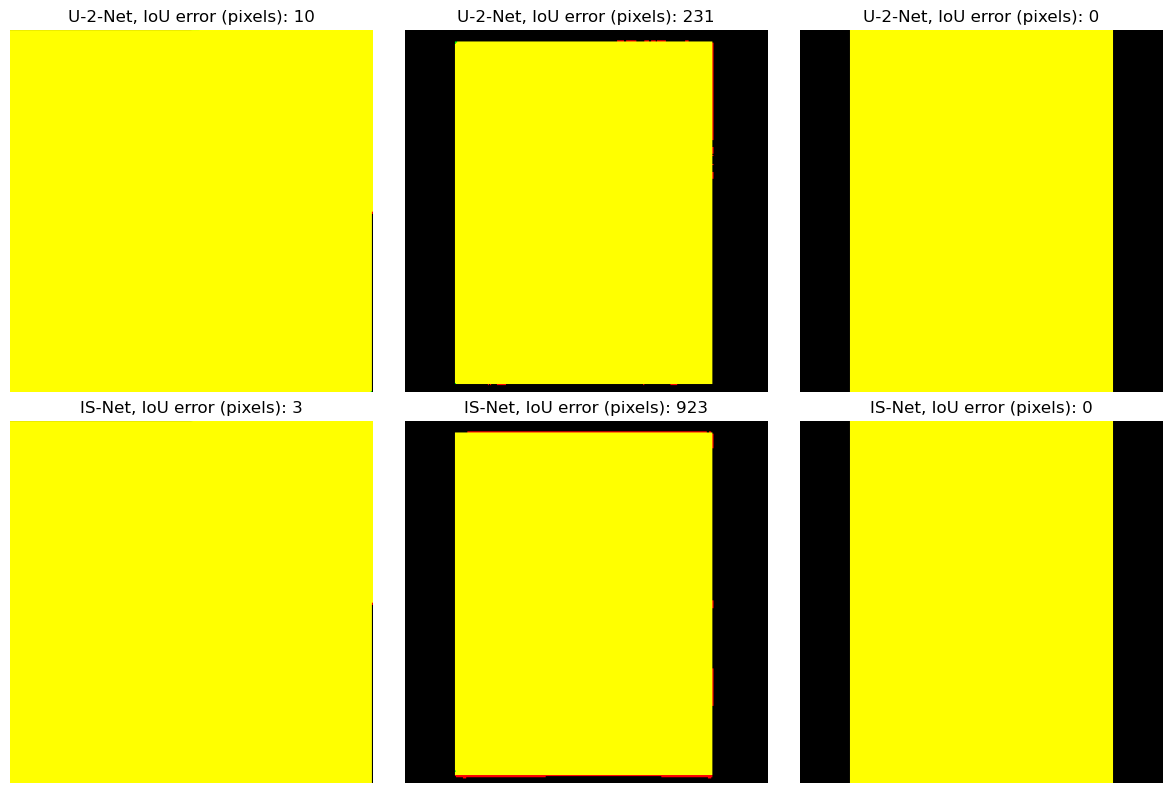

In [185]:
import matplotlib.pyplot as plt
import random


img_name_list = glob.glob(os.path.join(U2net_predicted_images_path, '*.png'))
random_indices = random.sample(range(len(img_name_list)), 3)
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for j, predicted_images_path in enumerate([U2net_predicted_images_path, IS_net_predicted_images_path]):
    for i, idx in enumerate(random_indices):
        image_path = img_name_list[idx]
        image_name = image_path.split(os.sep)[-1].replace('.jpg', '.png')
        prediction_path = os.path.join(predicted_images_path, image_name)
        prediction = Image.open(prediction_path).convert('L')
        prediction = np.array(prediction)
        prediction = np.where(prediction > 127, 255, 0)

        ground_truth_path = os.path.join(ground_truth_images_path, image_name)
        ground_truth = Image.open(ground_truth_path)
        ground_truth = np.array(ground_truth)
        ground_truth = np.where(ground_truth > 127, 255, 0)
        
        eval_image = np.zeros((prediction.shape[0], prediction.shape[1], 3), dtype=np.uint8)
        # set ground truth to green and prediction to red
        eval_image[:, :, 0] = prediction
        eval_image[:, :, 1] = ground_truth

        axs[j][i].imshow(eval_image)
        axs[j][i].set_title(f"{'U-2-Net' if j==0 else 'IS-Net'}, IoU error (pixels): {int(total_pixels - (U2Net_IoU_scores[idx] if j==0 else ISNet_IoU_scores[idx])* total_pixels)}")
        axs[j][i].axis('off')




plt.tight_layout()
plt.show()